# Linear Regression from Scratch

# Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
class SimpleLinearRegression:
    def __init__(self):
        self.slope_ = None
        self.intercept_ = None
        self.residual_ = None
        self.RSS = None
        self.TSS = None
        self.r2score_ = None
        
    def fit(self, x, y):
        # Calculate the mean of the input (x) and output data (y)
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        # Calculate the terms needed for the slope (b1) and intercept (bo) of the regression line 
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sum((x - x_mean) ** 2)

        # Calculate the slope (b1) and intercept (bo) of the regression line (regression equation)
        self.slope_ = numerator / denominator
        self.intercept_ = y_mean - self.slope_ * x_mean
        y_pred = self.intercept_ + self.slope_ * x
        self.residual_ = y - y_pred
        self.RSS = np.sum(self.residual_ ** 2)
        self.TSS = np.sum((y - y_mean) ** 2)
        self.r2score_ = 1 - (self.RSS / self.TSS)
        
        
        
    def predict(self, x):
        return self.intercept_ + self.slope_ * x

In [18]:
d = {'x': [1, 2, 3, 4, 5], 'y': [0.9, 2.5, 3.6, 3.5, 4.6]}

print(type(d))
print(d.keys())

# <class 'dict'>
# dict_keys(['x', 'y'])

<class 'dict'>
dict_keys(['x', 'y'])


In [19]:
df = pd.DataFrame(data=d)

print(type(df))
print(df.columns)
print(df.ndim)
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index(['x', 'y'], dtype='object')
2
(5, 2)
x      int64
y    float64
dtype: object


In [20]:
df

,x,y
0,1,0.9
1,2,2.5
2,3,3.6
3,4,3.5
4,5,4.6


In [21]:
X = df.iloc[:, :1].values    # input  or feature or independent variable 
y = df.iloc[:, -1].values    # output or target  or dependent variable 

In [22]:
print(type(X))
print(X.ndim)
print(X.shape)

print(type(y))
print(y.ndim)
print(y.shape)

<class 'numpy.ndarray'>
2
(5, 1)
<class 'numpy.ndarray'>
1
(5,)


In [31]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [32]:
y

array([0.9, 2.5, 3.6, 3.5, 4.6])

In [26]:
x = X.flatten()

nested lists or arrays to transform them into a single-dimensional list or array.

In [33]:
print(x.ndim)
print(x.shape)

1
(5,)


In [27]:
print(x)
print(y)

[1 2 3 4 5]
[0.9 2.5 3.6 3.5 4.6]


In [28]:
model = SimpleLinearRegression()
model.fit(x, y)
pred = model.predict(x)

In [29]:
print(f"Simple linear equation: y = {model.intercept_:.2f} + {model.slope_:.2f}x")
print(f"Slope: {model.slope_:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Residual: {model.residual_}")
print(f"Residual sum of squares (RSS): {model.RSS:.2f}")
print(f"Total sum of squares (TSS): {model.TSS:.2f}")
print(f"Coefficient of determination (R^2): {model.r2score_:.2f}")


print(y)


print(pred)


Simple linear equation: y = 0.50 + 0.84x
Slope: 0.84
Intercept: 0.50
Residual: [-0.44  0.32  0.58 -0.36 -0.1 ]
Residual sum of squares (RSS): 0.77
Total sum of squares (TSS): 7.83
Coefficient of determination (R^2): 0.90
[0.9 2.5 3.6 3.5 4.6]
[1.34 2.18 3.02 3.86 4.7 ]


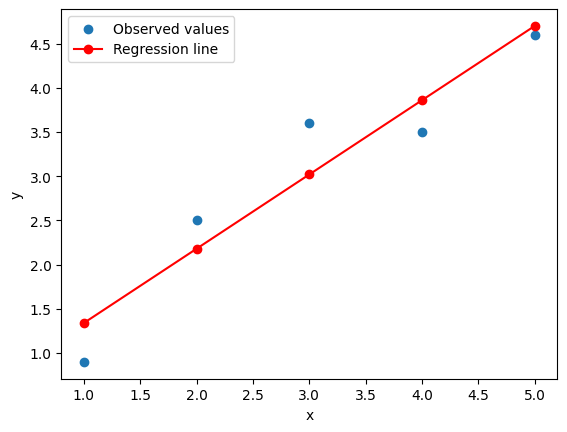

In [30]:
# Plot the observed values and the regression line
plt.scatter(x, y, label='Observed values')
plt.plot(x, pred, color='red', marker='o', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()